# Trabalho 1
## Lógica Computacional 2020-2021

> O propósito deste trabalho é a análise de problemas de alocação usando técnicas de SAT,  em lógica proposicional, e IP em lógica linear inteira.

> Trabalho realizado por: 
    > 1. Paulo Costa - A87986
    > 2. André Araújo - A87987


### Exercício 2


2. O  “pigeon hole principle” (PHP) é um problema clássico da complexidade. Basicamente

    > Existem $N$ pombos  e $N-1$ poleiros de pombos. Cada pombo ocupa totalmente um poleiro. Pretende-se alocar cada pombo a um poleiro próprio.
    >
    1. Provar que não existe solução do problema, usando  Z3 em 
        1. lógica proposional
        2. lógica inteira linear
    2. Analisar a complexidade de cada uma das provas em função de $N$ de forma empírica. Como sugestão pode começar por fazer um “plot” do tempo de execução.

### RESPOSTA:

A. 

a. Para provar que não e possivel colocar $N$ pombos  em  $N-1$ poleiros de pombos de forma a que cada pombo  ocupe totalmente um poleiro. Para tal, lógica proposional,vamos necessitar de $N \times N-1$ variáveis proposicionais, onde a variável $d_{p,pl}$ determina se o pombo $p$ vai para o poleiro $pl$. Assim temos que:

- Cada pombo $p$ tem exatamente um poleiro $pl$
- Cada poleiro $pl$ só tem um pombo $p$

>Ou seja para cada pombo $p$:
$$
\bigvee_{pl=0}^{N-2} d_{p,pl}
$$
\
$$
\bigwedge_{i=0}^{N-2} d_{p,i} \rightarrow \bigwedge_{j=i+1}^{N-2} \neg d_{p,j}
$$
\
>E para cada poleiro $pl$:
\
$$
\bigwedge_{i=0}^{N-2} d_{i,pl} \rightarrow \bigwedge_{j=i+1}^{N-2} \neg d_{j,pl}
$$    
    

In [2]:
from z3 import *
def testaPosibilidadeLP(n):
    s=Solver()
    np=n-1 #numero de poleiros 
    d={} 
    for p in range(n):
        d[p]={}
        for pl in range(np):
            d[p][pl]=Bool("d_"+str(p)+","+str(pl))
            
    #cada pombo tem um poleiro        
    for p in range(n):
        s.add(Or([d[p][pl] for pl in range(np)]))
        
    #cada pombo so tem um poleiro    
    for p in range(n):
        for i in range(np):
            s.add(Implies(d[p][i],And([Not(d[p][j]) for j in range(i+1,np)])))
            
    #cada poleiro so tem um pombo                                         
    for p in range(n):
        for pl in range(np):
            s.add(Implies(d[p][pl],And([Not(d[i][pl]) for i in range(p+1,n)])))  
            
    if s.check() == sat:
        return "Possivel"
    else:
        return "Impossivel"
    
testaPosibilidadeLP(4)

'Impossivel'


b. Para provar que não e possivel colocar $N$ pombos  em  $N-1$ poleiros de pombos de forma a que cada pombo  ocupe totalmente um poleiro. Em lógica inteira linear usamos programação inteira, ou seja, as variaveis inteiras são binarias onde a variavel $d_{p,pl}$ determina se o pombo $p$ vai para o poleiro $pl$
 
>- Cada pombo$p$ só deve ter um poleiro $pl$
\
$$ \forall_p \cdot \sum_{pl} d[p][pl] = 1$$ 
>- Cada poleiro $pl$ deve ter no maximo um pombo$p$.
\
    $$ \forall_pl \cdot \sum_{p} d[p][pl] <= 1$$ 

In [2]:
from z3 import *
def testaPosibilidadeLIL(n):
    s=Solver()
    np=n-1  #numero de poleiros
    d={} 
    
    for p in range(n):
        d[p]={}
        for pl in range(np):
            d[p][pl]=Int("Pombo_"+str(pl)+",Pombal_"+str(pl))
            #os pomboS tem de estar num poleiro valido
            s.add(And(d[p][pl]>=0,d[p][pl]<=1))
            
    #Cada poleiro deve ter no maximo um pombo
    
    for pl in range(np):
        s.add(Sum([d[p][pl] for p in range(n)])<=1)
        
    #cada pombo sÓ deve ter um poleiro
    
    for p in range(n):
        s.add(Sum([d[p][pl] for pl in range(np)])==1)
                  
            
    if s.check() == sat:
        return "Possivel"
    else:
        return "Impossivel"
        
testaPosibilidadeLIL(7)

'Impossivel'

B. 

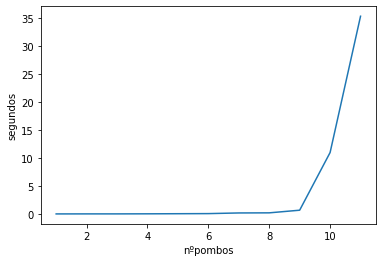

In [3]:
from z3 import *
from timeit import timeit
import matplotlib.pyplot as plot
def temposexecucaoLP(n):
    tempos=[]                  #lista com os tempos de execução
    for i in range(1,n+1):
        tempo=timeit(setup="from __main__ import testaPosibilidadeLP",\
                    stmt="testaPosibilidadeLP("+str(i)+")",number=1)
        tempos.append(tempo)
    return tempos

n=11
tempos= temposexecucaoLP(n)
x=range(1,n+1)
plot.plot(x,tempos)
plot.ylabel("segundos")
plot.xlabel("nºpombos")
plot.show()

>    Na solução utilizando a lógica proposional a complexidade é $n^3$, pois temos como complexidade do pior caso $2(n^3)+2(n^2)$ ,logo $O(testaPosibilidadeLP(N))=N^3$.

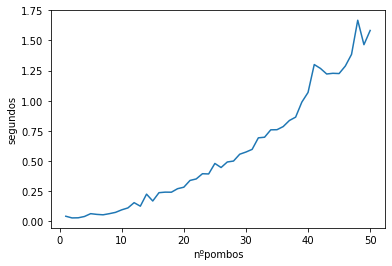

In [3]:
from z3 import *
from timeit import timeit
import matplotlib.pyplot as plot
def temposexecucaoLIL(n):
    tempos=[] #lista com os tempos de execoçao
    for i in range(1,n+1):
        tempo=timeit(setup="from __main__ import testaPosibilidadeLIL",\
                    stmt="testaPosibilidadeLIL("+str(i)+")",number=1)
        tempos.append(tempo)
    return tempos
n=50 
tempos= temposexecucaoLIL(n)
x=range(1,n+1)
plot.plot(x,tempos)
plot.ylabel("segundos")
plot.xlabel("nºpombos")
plot.show()

>Na solução utilizando a lógica inteira linear a complexidade é $n^2$, pois temos como complexidade do pior caso $3(n^2)$ ,logo $O(testaPosibilidadeLIL(N))=N^2$ 

### Conclusão:

> Neste exercício, achamos que conseguimos obter uma solução do problema que consegue de facto cumprir os objetivos pretendidos.
<br> \
> Mais uma vez, achamos que o mais "complicado" poderá ter sido, o processo para adoptar os requisitos necessário a ter no código em fórmulas proposicionais, apartir daqui torna-se muito mais fácil criar esta solução.
<br> \
> Depois na segunda parte do exercício, conseguimos obter a conclusão de que a função testaPosibilidadeLIL é mais eficiente do que a da alínea anterior (testaPosibilidadeLP), conseguimos verificar isto pelas complexidades de cada um nos seus piores casos. Enquanto que na solução utilizando lógica inteira linear, o pior caso é $3(n^2)$, utilizando a lógica proposicional, o pior caso já se demonstra como sendo $2(n^3)+2(n^2)$.
<br> \
> Achamos que o exercício foi concluído com bastante sucesso e que, sobretudo, conseguimos adotar uma solução que cumpre todos os requisitos do problema! 